In [1]:
import matplotlib.pyplot as plt
import numpy as np

from superfv import AdvectionSolver
import superfv.initial_conditions as ic
import superfv.visualization as vis

In [2]:
def passive_square(x, y, z):
    xc, yc = x - 0.5, y - 0.75
    return np.where(
        (np.abs(xc) < 0.15) & (np.abs(yc) < 0.15),
        1.0,
        0.0,
    )


sim = AdvectionSolver(
    ic=ic.slotted_disk,
    ic_passives={"passive_square": passive_square},
    bcx="ic",
    bcy="ic",
    nx=64,
    ny=64,
    nz=1,
    p=3,
    interpolation_scheme="transverse",
    MOOD=True,
    NAD=1e-5,
)

# sim.run([np.pi, 2 * np.pi])
sim.run(n=20)

100%|██████████| 20/20 [00:02<00:00,  8.08it/s]


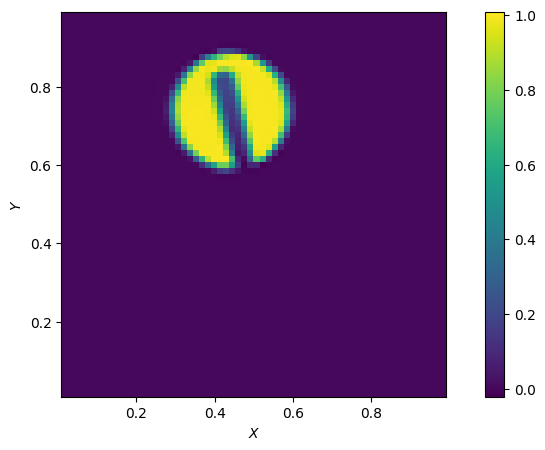

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
vis.plot_2d_slice(sim, ax, "rho", x=None, y=None)
# add colorbar
ax.figure.colorbar(ax.images[0], ax=ax)

In [4]:
sim.timer.print_report()

Category                                              Calls      Cumulative Time
----------------------------------------------------------------------------------
!ExplicitODESolver.integrate.body                         1                 2.50
!FiniteVolumeSolver.run                                   1                 2.52
AdvectionSolver.advection_upwind                        320                 0.07
AdvectionSolver.compute_dt                              160                 0.01
AdvectionSolver.minisnapshot                             21                 0.00
ExplicitODESolver.integrate                               1                 2.52
ExplicitODESolver.minisnapshot                           21                 0.00
FiniteVolumeSolver.MOOD_loop                             80                 1.36
FiniteVolumeSolver.apply_bc                            1042                 1.89
FiniteVolumeSolver.compute_dt_and_fluxes                160                 1.97
FiniteVolumeSolver.compute